In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 1

In [35]:
def SIR(S0,I0,R0, pC, P, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    G = len(S0)
    S = np.zeros([len(T),G])
    I = np.zeros([len(T),G])
    R = np.zeros([len(T),G])

    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N = S[0,:] + I[0,:] + R[0,:]
        else:
            Q = np.diag(S[idx-1,:] * P) @ pC @ I[idx-1,:] / N # compare this to notes...
            dS_dt = -Q
            dI_dt = Q - gamma*I[idx-1,:]
            dR_dt = gamma*I[idx-1,:]
            
            S[idx] = S[idx-1,:] + dS_dt * stepsize
            I[idx] = I[idx-1,:] + dI_dt * stepsize
            R[idx] = R[idx-1,:] + dR_dt * stepsize
    
    return S, I, R, T

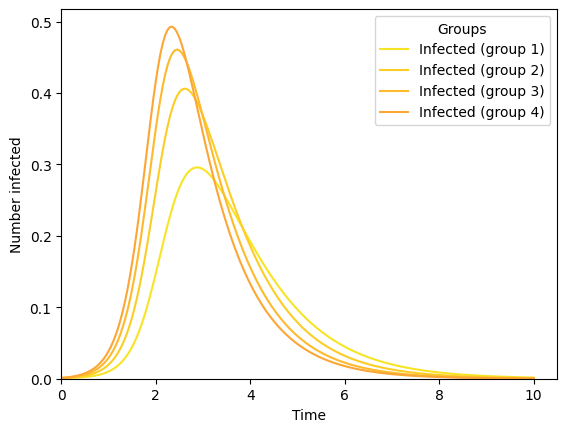

In [36]:
# SIR(S0,I0,R0, pC, gamma, t_max, stepsize):
pC = np.full((4, 4), 0.4505)
P = np.array([1, 2, 3, 4])

S,I,R,T = SIR(S0=[999,999,999,999],I0=[1,1,1,1],R0=[0,0,0,0],
             pC=pC, P = P, gamma=1,t_max=10,stepsize=0.05)
fig, ax = plt.subplots()
colors = plt.cm.plasma(np.linspace(.95, .80, 4))
for group in range(4):
    ax.plot(T, I[:, group]/1000, color=colors[group],
            label=f'Infected (group {group+1})')

ax.set_xlabel('Time')
ax.set_ylabel('Number infected')
ax.legend(title='Groups')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.show()

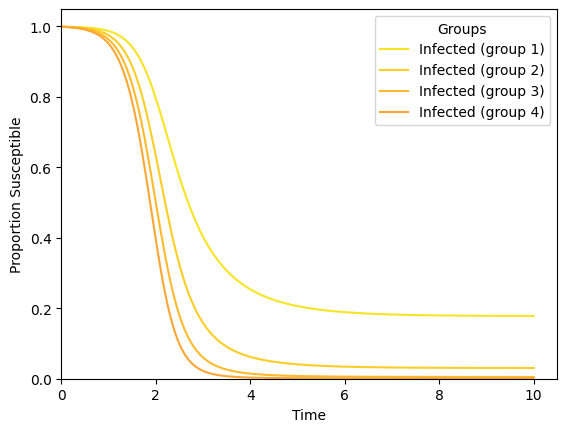

In [37]:
fig, ax = plt.subplots()
for group in range(4):
    ax.plot(T, S[:, group]/1000, color=colors[group],
            label=f'Infected (group {group+1})')

ax.set_xlabel('Time')
ax.set_ylabel('Proportion Susceptible')
ax.legend(title='Groups')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.show()

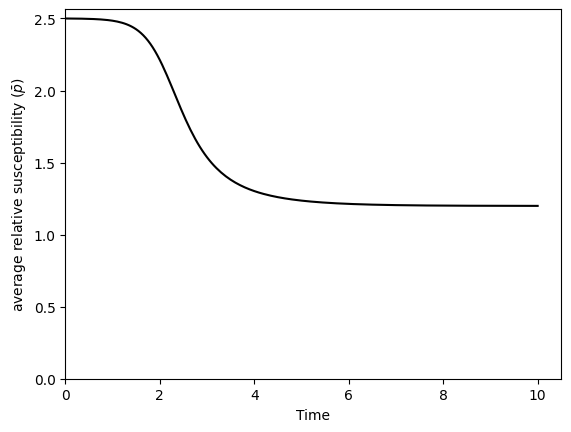

In [38]:

p_bar = np.zeros([len(T)])

for i, s_i in enumerate(S):
    numerator = (1 * s_i[0] + 2 * s_i[1] + 3 * s_i[2] + 4 * s_i[3])
    denominator = (s_i[0] + s_i[1] + s_i[2] + s_i[3])
    p_bar[i] = numerator / denominator

fig, ax = plt.subplots()
ax.plot(T, p_bar, color='black')
ax.set_xlabel('Time')
ax.set_ylabel(r'average relative susceptibility ($\bar{p}$)')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.show()

# 2

In [67]:
from scipy.stats import nbinom
k = 0.1 # Dispersion Parameter k
R0 = 3 # Mean R0

In [ ]:
def binomial_branching_process(G, R_0, k):
    mean = R_0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)

    infecteds = [1]
    
    for _ in range(G):
        new_cases = 0
        for _ in range(infecteds[-1]):
            new_cases += nbinom.rvs(n=n, p=p)
        infecteds.append(new_cases)
        
        if new_cases == 0:
            break
            
    return infecteds

In [82]:
def extinction_probability(R_0, k, n_trials, generations):
    extinct = 0
    for _ in range(n_trials):
        infections = binomial_branching_process(G=generations, R_0=R_0, k=k)
        if infections[-1] == 0:
            extinct += 1
    return extinct / n_trials

In [86]:
dispersion_params = [0.1, 0.5, 1.0, 5.0, 10.0]

[extinction_probability(R0, k, 100000, 50) for k in dispersion_params]

[0.71083, 0.37995, 0.25193, 0.09648, 0.07163]